# Deep Learning - Day 2 - Finetune your Neural Network

### Exercise objectives:
- Finetune the model optimizer
- Save and load a neural network

<hr>
<hr>

Now that you have mastered almost every part of Neural Networks, let's take a closer look at the `compile` part.

# Data

We will here use the data from the Boston Housing dataset

❓ **Question** ❓ First, load the data with the appropriate function 

Classify and score starts-ups to predict deeptechs (and more?)

In [1]:
from tensorflow.keras.datasets import boston_housing

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
X_train.shape

(404, 13)

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your prediction corresponds to the mean value of $y$ computed on the train set?

In [4]:
from sklearn.dummy import DummyRegressor
dum = DummyRegressor(strategy='mean')
dum.fit(X_train,y_train)
y_pred = dum.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

6.533042127742185

# Part I: The model

❓ **Question** ❓ Now, write in a function `initialize_model` a neural network that has 3 layers: 
- a layer with 10 neurons and the `relu` activation function (appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10, input_dim = 13, activation = 'relu'))
    model.add(layers.Dense(7, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'linear'))
    return model


# Part II : The optimizer

❓ **Question** ❓ Write a function that takes as argument a model and a name of optimizer, that compiles the model and returns it - select the loss and metrics wisely.

In [6]:
def compile_model(model, optimizer_name):
    model.compile(loss='mse',
                  optimizer=optimizer_name,
                  metrics=['mae'])
    
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. Evaluate your model on the test data.

Do not forget to use an early stopping criterion.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 10)

model = compile_model(initialize_model(), 'adam')

model.fit(X_train, y_train, 
        validation_split=0.3,
        batch_size=15,
        epochs=100,
        verbose=0,
        callbacks=[es])
results = model.evaluate(X_test, y_test)
print('mae =',round(results[1],2))

4/4 [==============================] - 0s 1ms/step - loss: 50.8354 - mae: 5.3924
mae = 5.39


❓ **Question** ❓ Rerun the same model on the same data but with different optimizer (in a `for` loop). For each, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers))

In [8]:
import matplotlib.pyplot as plt
def plot_loss_mae(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [9]:
es = EarlyStopping(patience = 30)
mae_result = []
histories = []
optimizer = ['adam', 'adadelta', 'RMSprop', 'Adamax']
for optimizer in optimizer:  
    model = compile_model(initialize_model(), optimizer)
    history = model.fit(X_train, y_train,
        validation_split=0.3,
        batch_size=15,
        epochs=200,
        verbose=0,
        callbacks=[es])
    mae_result.append(model.evaluate(X_test, y_test)[1])
    histories.append(history)
mae_result

4/4 [==============================] - 0s 1ms/step - loss: 44.4379 - mae: 4.6141


[4.355519771575928, 30.134767532348633, 6.145599365234375, 4.614087104797363]

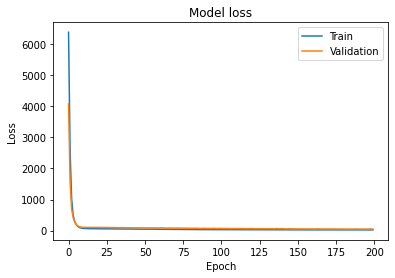

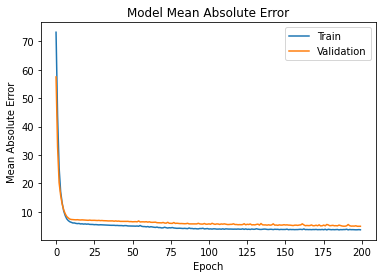

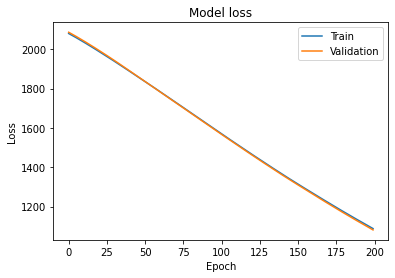

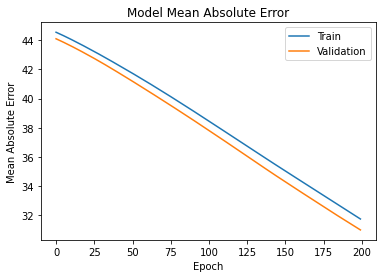

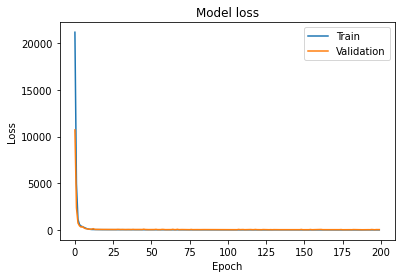

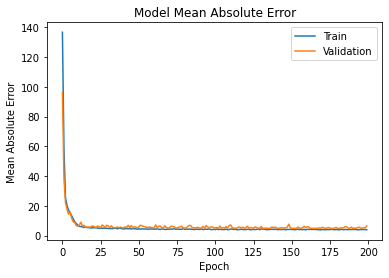

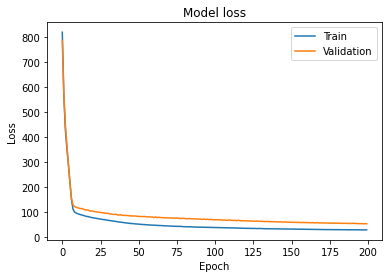

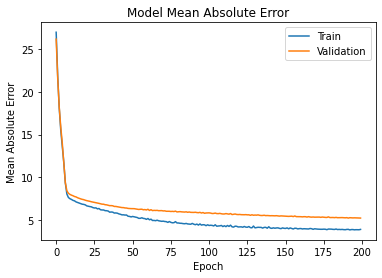

In [10]:
for history in histories:
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark prediction you evaluate at the beginning of the notebook?

In [11]:
# not by much

❗ **Remark** ❗ Here, the optimizer is not central as the data are in low dimension and not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 


❗ **Remark** ❗ Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer rely on. Among this hyperparameters, there is quite an important one, the learning rate. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instanciate it with a learning rate of 0.1 - keep the other values to their default values.

In [12]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.1)

model = compile_model(initialize_model(), adam)

history = model.fit(X_train, y_train, 
        validation_split=0.3,
        batch_size=15,
        epochs=100,
        verbose=0,
        callbacks=[es])
results = model.evaluate(X_test, y_test)
print('mae =',round(results[1],2))

4/4 [==============================] - 0s 993us/step - loss: 84.6121 - mae: 6.5137
mae = 6.51


❓ **Question** ❓ Use this optimizer in the `compile_model` function, fit the data and plot the history

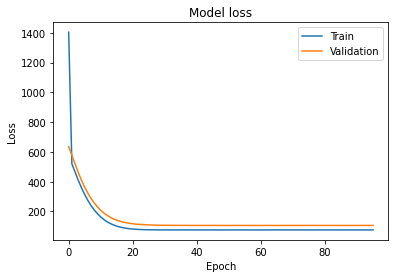

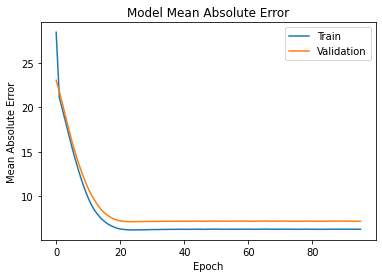

In [13]:
plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

Remark: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

In [14]:
def plot_loss_mae(history, n_epochs):
    plt.plot(history.history['loss'][n_epochs:])
    plt.plot(history.history['val_loss'][n_epochs:])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'][n_epochs:])
    plt.plot(history.history['val_mae'][n_epochs:])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

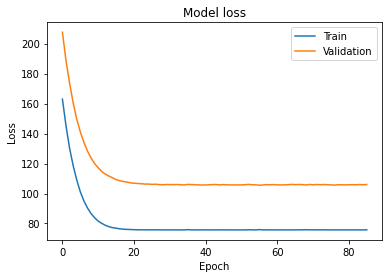

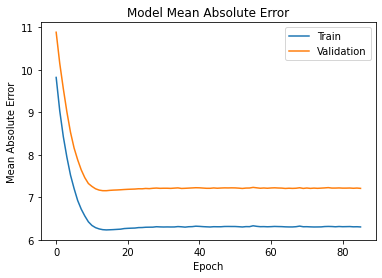

In [15]:
plot_loss_mae(history, 10)

In [16]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]
mae_result = []
histories = []
for lr in learning_rates:
    adam = Adam(learning_rate=lr)
    model = compile_model(initialize_model(), adam)
    history = model.fit(X_train, y_train, 
        validation_split=0.3,
        batch_size=15,
        epochs=100,
        verbose=0,
        callbacks=[es])
    mae_result.append(model.evaluate(X_test, y_test)[1])
    histories.append(history)
mae_result

4/4 [==============================] - 0s 1ms/step - loss: 2018.4010 - mae: 43.9904


[7.143373012542725,
 4.273339748382568,
 5.450161933898926,
 4.009756565093994,
 6.517102241516113,
 43.99042510986328]

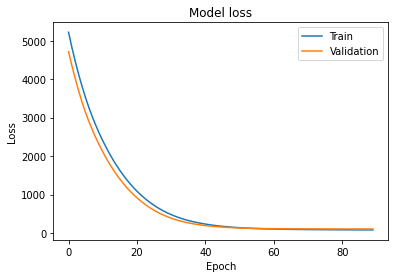

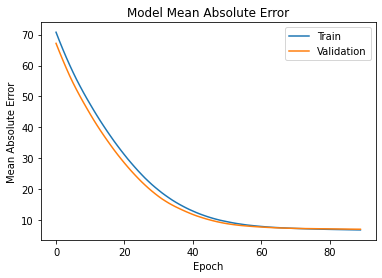

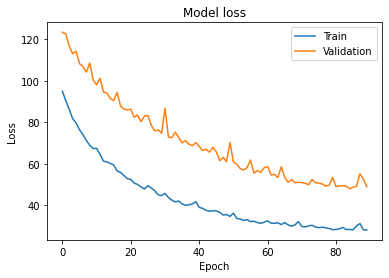

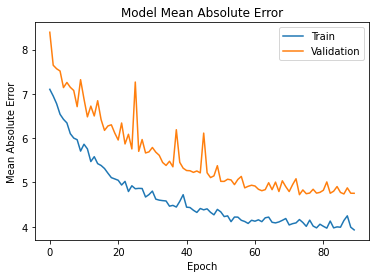

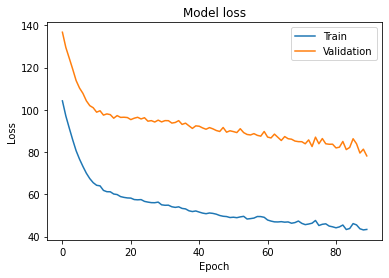

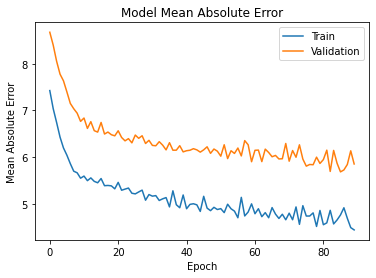

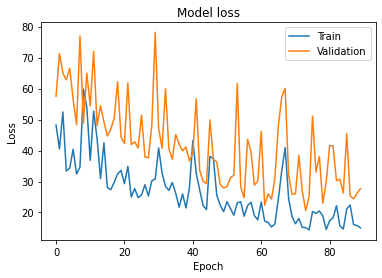

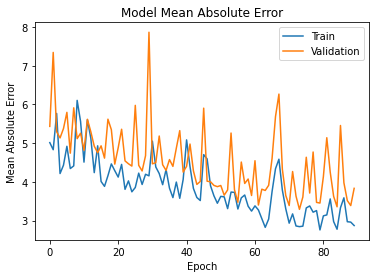

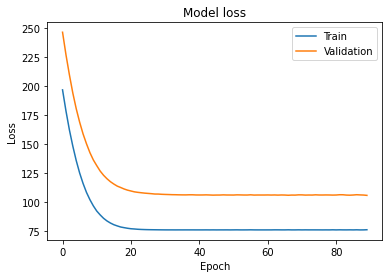

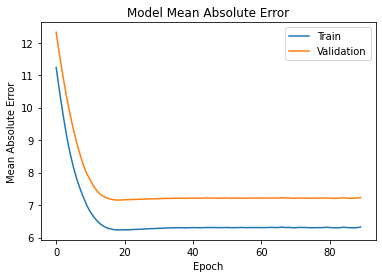

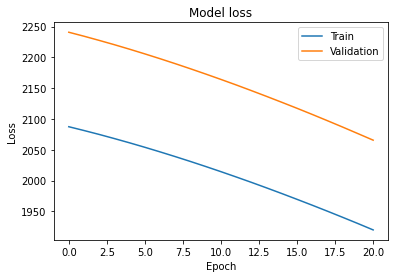

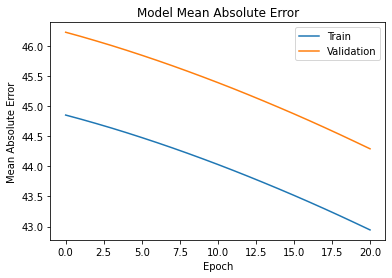

In [17]:
for history in histories:
    plot_loss_mae(history, 10)

### Advanced & Optional

The next question is optional and intended for advanced users that are willing to go a step further in their Deep Learning skills. However, it is not essential and can be skiped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that you first need large learning rates, and as the neural network converges and get closer to the minimum, you decrease the value of the learning rate. This is called a scheduler. 

❓ **Question** ❓ Use the [exponential decay scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the adam optimizer and run it on the previous data. Plot the history and check how the loss and mae evolve.

In [18]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# YOUR CODE HERE

In [19]:
# YOUR PLOT HERE

# Part II : The loss

It is important to clearly understand the different between metrics and loss. The loss are part of the metrics, therefore some metrics can be used as loss.

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`. In both case, report the final mean absolute error and compare the history.

In [20]:
loss = ['mae', 'mse']
mae_result = []
histories = []
for ls in loss:
    adam = Adam(learning_rate=0.1)
    model = initialize_model()
    model.compile(loss = ls, optimizer = adam, metrics = ['mae'])
    history = model.fit(X_train, y_train, 
        validation_split=0.3,
        batch_size=15,
        epochs=100,
        verbose=0,
        callbacks=[es])
    mae_result.append(model.evaluate(X_test, y_test)[1])
    histories.append(history)
mae_result

4/4 [==============================] - 0s 1ms/step - loss: 44.5612 - mae: 5.2895


[6.662164211273193, 5.289482116699219]

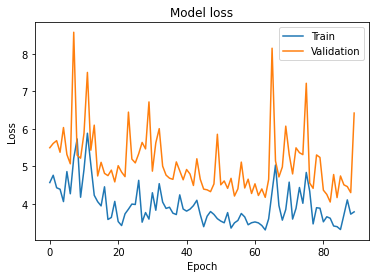

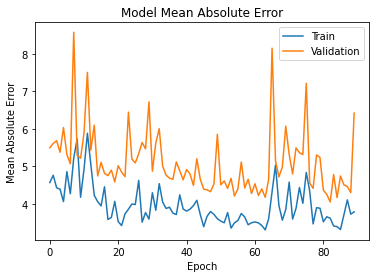

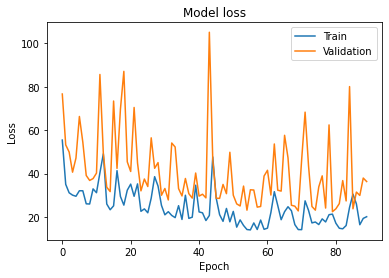

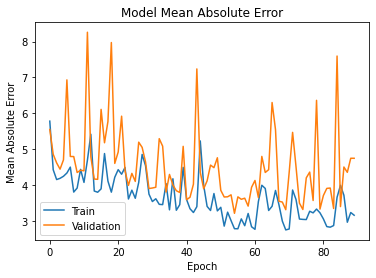

In [21]:
for history in histories:
    plot_loss_mae(history, 10)

Finally, you see that even if the Mean Absolute Error is the final metric you optimize, it can be better for your algorithm to use the mean square error as the loss to optimize its weights and give the best MAE possible. 

# Part IV : Save and load a model

Here, we will see how to save a model, and load it afterwards.

❓ **Question** ❓ Rerun any model you want and evaluate it on the test set.

In [22]:
adam = Adam(learning_rate=0.01)
model = initialize_model()
model.compile(loss = 'mse', optimizer = adam, metrics = ['mae'])
history = model.fit(X_train, y_train, 
    validation_split=0.3,
    batch_size=15,
    epochs=200,
    verbose=0,
    callbacks=[es])
print('mae = ', model.evaluate(X_test, y_test)[1])

4/4 [==============================] - 0s 1ms/step - loss: 34.8215 - mae: 4.5745
mae =  4.574473857879639


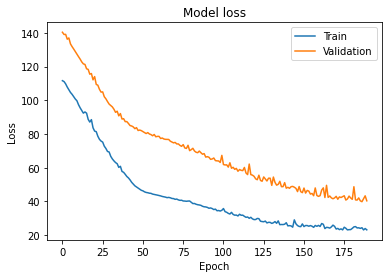

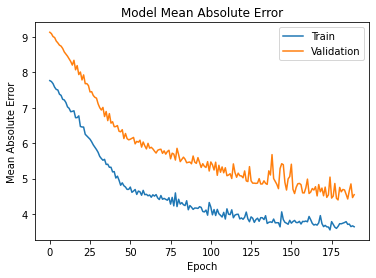

In [23]:
plot_loss_mae(history, 10)

❓ **Question** ❓ Now, save the model thanks to the `save_model` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

In [24]:
models.save_model(model, 'my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


❓ **Question** ❓ Now, in a variable `loaded_model`, load the model you just saved thanks to the `load_model` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to see that it gives the same result as before.

In [25]:
loaded_model = models.load_model('my_model')

# Part V : Use regularizers [ Advanced ]

In this part of the notebook, we will see how to use regularizers in a neural network. Regularizers are used to prevent overfitting that can happends because very complex networks have many many parameters which tends to overfit the training data.

❓ **Question** ❓ First, initialize a model that has a lot of parameters (many layers and/or many neurons) such that it overfits the training data (to better see the effect, do not use any early stopping criterion). 

NB: You can use the `validation_data` (instead of `validation_split`) to compute the error on the test set at each epoch.



<details>
    <summary>(It might be not easy to overfit as the data as quite small - in term of number of features. Click here to get some hints)</summary>
If you choose a neural networkk with the following layers:
    
    - 1000 neurons
    
    - 1000 neurons
    
    - 750 neurons
    
    - 750 neurons
    
    - 500 neurons
    
    - 500 neurons
    
And more than 2000 epochs (it will take some time to train),
you should see some overfitting of the training data, meaning that the accuracy on the test lost will get worse at some point.
</details>

In [26]:
def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(1000, input_dim = 13, activation = 'relu'))
    model.add(layers.Dense(1000, activation = 'relu'))
    model.add(layers.Dense(750, activation = 'relu'))
    model.add(layers.Dense(750, activation = 'relu'))
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'linear'))
    return model
model = initialize_model()

In [32]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
history = model.fit(X_train, y_train, 
    validation_data= (X_test, y_test),
    batch_size=15,
    epochs=10,
    verbose=1)
print('mae = ', model.evaluate(X_test, y_test)[1])

Epoch 1/10
27/27 [==============================] - 1s 39ms/step - loss: 805.6621 - mae: 11.6672 - val_loss: 381.8168 - val_mae: 6.6007
Epoch 2/10
27/27 [==============================] - 1s 34ms/step - loss: 332.6697 - mae: 6.4861 - val_loss: 285.9522 - val_mae: 6.0110
Epoch 3/10
27/27 [==============================] - 1s 34ms/step - loss: 303.4850 - mae: 6.9250 - val_loss: 279.1736 - val_mae: 6.4715
Epoch 4/10
27/27 [==============================] - 1s 34ms/step - loss: 271.7156 - mae: 5.7528 - val_loss: 264.5152 - val_mae: 5.7903
Epoch 5/10
27/27 [==============================] - 1s 35ms/step - loss: 262.8683 - mae: 5.6089 - val_loss: 258.4043 - val_mae: 5.9633
Epoch 6/10
27/27 [==============================] - 1s 36ms/step - loss: 254.3509 - mae: 5.5266 - val_loss: 257.5836 - val_mae: 6.0327
Epoch 7/10
27/27 [==============================] - 1s 37ms/step - loss: 248.2503 - mae: 5.5250 - val_loss: 241.8273 - val_mae: 5.6526
Epoch 8/10
27/27 [==============================] - 1s

In your overparametrized network, some neurons got too specific to given training data, preventing the network from generalizing to new data. This lead to some overfitting. 

For that reason, we will use dropout layers, whose role is to _cancel_ the output of some neurons  during the training part. By doing this at random, it prevents the network from getting too specific to the input data : no any neuron can be too specific to a given input as its output is sometimes cancelled by the dropout layer. Overall, it forces the information that is contain in one input sample to go through multiple neurons instead of only one specific.

❓ **Question** ❓ Try adding dropout layers to your neural network and look at the effect on the loss on the test set.

In [28]:
from tensorflow.keras.regularizers import Regularizer

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(1000, input_dim = 13, activation = 'relu'))
    model.add(layers.Dense(1000, activation = 'relu'))
    model.add(layers.Dense(750, activation = 'relu'))
    model.add(layers.Dense(750, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2)) 
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2)) 
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2)) 
    model.add(layers.Dense(1, activation = 'linear'))
    return model
model = initialize_model()

There are other ways to prevent overfitting in a neural network. The standard one (apart Dropout) is to regularize the outputs of a layer, as in linear regression regularization where the weights of the linear regression are constrained by L1, L2 or L1 and L2 norms.

Such regularization can be done at each layer for:
- all the biases of the layer, with `bias_regularizer` argument
- all the weights of the layer, with the `kernel_regularizer` argument
- the outputs of the layer (after the activity function) with the `activity_regularizer` argument

❓ **Question** ❓ Add some of the previous regularizers to the Dense layers of your previous neural networks - and without dropout layers, as it can interact in a way that you are not sure of. 

In [31]:
from tensorflow.keras import regularizers

reg_l1 = regularizers.l1(0.01)
reg_l2 = regularizers.l2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(1000, input_dim = 13, activation = 'relu'))
    model.add(layers.Dense(1000, activation = 'relu', kernel_regularizer=reg_l1))
    model.add(layers.Dense(750, activation = 'relu', kernel_regularizer=reg_l1))
    model.add(layers.Dense(750, activation = 'relu'))
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'linear'))
    return model
model = initialize_model()

Remark: You probably have seen very little difference in the previous examples. This is due to the simplicity of the data. However, in other cases, especially in the last exercice (open challenge), the data are more complex, and for some architectures, you might encounter overfitting that you can prevent thanks to regularization techniques as overfitting or L1/L2 regularizations.

# Part VI : Get the best Mean Absolute Error

From here, you are free to:
- design your own architecture: number of layers, number of neurons, activation function
- choose the loss and metric
- choose the optimizer and tune its hyperparameters
- select the best options for the early stopping criterion

to get the best mean absolute error.

Once you have your best score on the test set, include the whole pipeline into a proper cross validation to report your score (mean ± std).
